In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('datafiles/brisbane_water_quality.csv')

In [2]:
df.columns

Index(['Timestamp', 'Record number', 'Average Water Speed',
       'Average Water Direction', 'Chlorophyll', 'Chlorophyll [quality]',
       'Temperature', 'Temperature [quality]', 'Dissolved Oxygen',
       'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation)',
       'Dissolved Oxygen (%Saturation) [quality]', 'pH', 'pH [quality]',
       'Salinity', 'Salinity [quality]', 'Specific Conductance',
       'Specific Conductance [quality]', 'Turbidity', 'Turbidity [quality]'],
      dtype='object')

In [3]:
# Drop columns with quality information
df = df.drop(columns=['Dissolved Oxygen [quality]', 'Chlorophyll [quality]', 'Temperature [quality]',
                      'Dissolved Oxygen (%Saturation) [quality]', 'pH [quality]', 'Salinity [quality]',
                      'Specific Conductance [quality]', 'Turbidity [quality]', 'Record number'], errors='ignore')

In [4]:
df.columns

Index(['Timestamp', 'Average Water Speed', 'Average Water Direction',
       'Chlorophyll', 'Temperature', 'Dissolved Oxygen',
       'Dissolved Oxygen (%Saturation)', 'pH', 'Salinity',
       'Specific Conductance', 'Turbidity'],
      dtype='object')

In [5]:
df.shape

(30894, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       30894 non-null  object 
 1   Average Water Speed             30874 non-null  float64
 2   Average Water Direction         30893 non-null  float64
 3   Chlorophyll                     30309 non-null  float64
 4   Temperature                     25730 non-null  float64
 5   Dissolved Oxygen                26594 non-null  float64
 6   Dissolved Oxygen (%Saturation)  25145 non-null  float64
 7   pH                              29810 non-null  float64
 8   Salinity                        26936 non-null  float64
 9   Specific Conductance            29527 non-null  float64
 10  Turbidity                       28894 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.6+ MB


In [7]:
# Convert 'Timestamp' column to datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       30894 non-null  datetime64[ns]
 1   Average Water Speed             30874 non-null  float64       
 2   Average Water Direction         30893 non-null  float64       
 3   Chlorophyll                     30309 non-null  float64       
 4   Temperature                     25730 non-null  float64       
 5   Dissolved Oxygen                26594 non-null  float64       
 6   Dissolved Oxygen (%Saturation)  25145 non-null  float64       
 7   pH                              29810 non-null  float64       
 8   Salinity                        26936 non-null  float64       
 9   Specific Conductance            29527 non-null  float64       
 10  Turbidity                       28894 non-null  float64       
dtypes:

In [9]:
df.head

<bound method NDFrame.head of                 Timestamp  Average Water Speed  Average Water Direction  \
0     2023-08-04 23:00:00                4.834                   73.484   
1     2023-08-04 23:30:00                2.544                  106.424   
2     2023-08-04 23:00:00                1.260                  156.755   
3     2023-08-04 23:30:00                0.760                  281.754   
4     2023-08-04 23:00:00                3.397                  244.637   
...                   ...                  ...                      ...   
30889 2024-06-27 08:20:00               13.314                   82.720   
30890 2024-06-27 08:30:00               32.617                   18.081   
30891 2024-06-27 08:40:00                8.552                  306.184   
30892 2024-06-27 08:50:00               10.341                   24.711   
30893 2024-06-27 09:00:00               11.173                  241.662   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0            1.6

In [10]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfYear'] = df['Timestamp'].dt.dayofyear
df['Month'] = df['Timestamp'].dt.month

df.head()

,Timestamp,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Hour,DayOfYear,Month
0,2023-08-04 23:00:00,4.834,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068,23,216,8
1,2023-08-04 23:30:00,2.544,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994,23,216,8
2,2023-08-04 23:00:00,1.260,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030,23,216,8
3,2023-08-04 23:30:00,0.760,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973,23,216,8
4,2023-08-04 23:00:00,3.397,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944,23,216,8


In [11]:
duplicate_timestamps = df[df.duplicated(subset=['Timestamp'], keep=False)]
if not duplicate_timestamps.empty:
    print("Duplicate timestamps exist:")
    print(duplicate_timestamps)
else:
    print("No duplicate timestamps found.")

Duplicate timestamps exist:
                Timestamp  Average Water Speed  Average Water Direction  \
0     2023-08-04 23:00:00                4.834                   73.484   
1     2023-08-04 23:30:00                2.544                  106.424   
2     2023-08-04 23:00:00                1.260                  156.755   
3     2023-08-04 23:30:00                0.760                  281.754   
4     2023-08-04 23:00:00                3.397                  244.637   
...                   ...                  ...                      ...   
30459 2024-06-24 09:00:00               23.286                  102.621   
30603 2024-06-25 09:00:00                5.070                   29.750   
30604 2024-06-25 09:00:00                5.070                   29.750   
30748 2024-06-26 09:00:00               42.538                  212.200   
30749 2024-06-26 09:00:00               42.538                  212.200   

       Chlorophyll  Temperature  Dissolved Oxygen  \
0            1.621

In [12]:
# Remove duplicate timestamps by averaging values for duplicate timestamps
df.set_index('Timestamp', inplace=True)
df = df.groupby(df.index).mean()

df.shape

(30614, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30614 entries, 2023-08-04 23:00:00 to 2024-06-27 09:00:00
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Water Speed             30594 non-null  float64
 1   Average Water Direction         30613 non-null  float64
 2   Chlorophyll                     30041 non-null  float64
 3   Temperature                     25491 non-null  float64
 4   Dissolved Oxygen                26370 non-null  float64
 5   Dissolved Oxygen (%Saturation)  24938 non-null  float64
 6   pH                              29546 non-null  float64
 7   Salinity                        26705 non-null  float64
 8   Specific Conductance            29266 non-null  float64
 9   Turbidity                       28654 non-null  float64
 10  Hour                            30614 non-null  float64
 11  DayOfYear                       30614 non-null  float64
 1

In [14]:
# Check for negative values in each column
negative_counts = (df < 0).sum()

print("Columns with negative values:")
print(negative_counts)


Columns with negative values:
Average Water Speed               0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
Hour                              0
DayOfYear                         0
Month                             0
dtype: int64


In [15]:
# Check for missing values before imputation
df.isnull().sum()

Average Water Speed                 20
Average Water Direction              1
Chlorophyll                        573
Temperature                       5123
Dissolved Oxygen                  4244
Dissolved Oxygen (%Saturation)    5676
pH                                1068
Salinity                          3909
Specific Conductance              1348
Turbidity                         1960
Hour                                 0
DayOfYear                            0
Month                                0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 

# Fit the imputer on the DataFrame's numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Check for missing values after imputation
df.isnull().sum()

Average Water Speed               0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
Hour                              0
DayOfYear                         0
Month                             0
dtype: int64

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def detect_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    outlier_indices = set()

    for col in df.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[z_scores >= threshold]
        outlier_counts[col] = len(outliers)
        outlier_indices.update(outliers.index)  # store row indices

    return outlier_counts, outlier_indices

def remove_outliers_zscore(df, threshold=3):
    outlier_counts_before, outlier_indices = detect_outliers_zscore(df, threshold)

    print("\nOutlier counts BEFORE removal:")
    for col, count in outlier_counts_before.items():
        print(f"{col}: {count} outliers")

    print(f"\nTotal rows to be removed: {len(outlier_indices)}")

    # Remove outlier rows
    df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

    # Detect outliers again after removal
    outlier_counts_after, _ = detect_outliers_zscore(df_cleaned, threshold)

    print(f"\nOriginal shape: {df.shape}")
    print(f"Cleaned shape: {df_cleaned.shape}")

    return df_cleaned

df = remove_outliers_zscore(df, threshold=3)


Outlier counts BEFORE removal:
Average Water Speed: 410 outliers
Average Water Direction: 0 outliers
Chlorophyll: 357 outliers
Temperature: 0 outliers
Dissolved Oxygen: 264 outliers
Dissolved Oxygen (%Saturation): 402 outliers
pH: 42 outliers
Salinity: 368 outliers
Specific Conductance: 375 outliers
Turbidity: 600 outliers
Hour: 0 outliers
DayOfYear: 0 outliers
Month: 0 outliers

Total rows to be removed: 2112

Original shape: (30614, 13)
Cleaned shape: (28502, 13)


In [18]:
df.head()

,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Hour,DayOfYear,Month
0,2.771750,143.78675,1.70275,19.959750,7.440250,100.644250,8.169,35.221250,53.270500,2.041500,23.0,216.0,8.0
1,3.308667,176.67400,1.94100,19.932667,7.436333,100.545333,8.168,35.226333,53.277333,1.972333,23.0,216.0,8.0
2,9.138000,52.00500,1.44300,19.822000,7.459000,100.667000,8.159,35.271000,53.337000,2.033000,0.0,217.0,8.0
3,2.982000,93.11700,1.43300,19.804000,7.446000,100.471000,8.166,35.273000,53.339000,1.995000,0.0,217.0,8.0
4,9.851000,53.06200,1.49900,19.770000,7.454000,100.515000,8.168,35.283000,53.353000,1.973000,1.0,217.0,8.0


In [19]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the data and convert back to DataFrame
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Now you can use DataFrame methods
df.head()


,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Hour,DayOfYear,Month
0,-1.120456,-0.323561,-0.603827,-1.428923,1.178197,0.603918,1.201306,1.409796,1.122769,-0.669970,1.664538,0.484837,0.592563
1,-1.075374,-0.006426,-0.453122,-1.437394,1.170822,0.588776,1.189980,1.411576,1.124315,-0.704747,1.664538,0.484837,0.592563
2,-0.585918,-1.208621,-0.768132,-1.472007,1.213500,0.607401,1.088043,1.427221,1.137813,-0.674244,-1.659720,0.493278,0.592563
3,-1.102803,-0.812174,-0.774458,-1.477637,1.189023,0.577398,1.167327,1.427922,1.138266,-0.693350,-1.659720,0.493278,0.592563
4,-0.526051,-1.198428,-0.732709,-1.488271,1.204086,0.584133,1.189980,1.431425,1.141433,-0.704412,-1.515187,0.493278,0.592563


In [20]:
df.to_csv('datafiles/after-scaling.csv', index=True)

In [21]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA to retain 95% of explained variance
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)

# Get number of components selected automatically
n_components = pca.n_components_

# Convert to DataFrame with appropriate column names
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Confirm shape of PCA-transformed data
print(f"PCA shape: {df_pca.shape}")
print(f"Number of components selected to retain 95% variance: {n_components}")

PCA shape: (28502, 9)
Number of components selected to retain 95% variance: 9


In [22]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.897854,2.562362,-0.104782,-0.963767,0.158439,0.351743,1.284932,0.145764,1.000324
1,1.877281,2.567332,-0.078607,-0.790027,0.434334,0.369553,1.202859,0.257459,1.001855
2,1.959166,1.417454,-1.168130,-1.553946,-0.724438,-1.359210,-1.008425,-0.381034,1.231552
3,1.983467,1.477385,-1.169859,-1.820416,-0.153825,-1.339433,-0.921679,-0.404807,1.127033
4,1.942489,1.493230,-1.175911,-1.482212,-0.739944,-1.292218,-0.909097,-0.294695,1.287248


In [23]:
# Specify the file path and name
name = 'datafiles/preprocessed_water_quality.csv'  

# Save the DataFrame to a CSV file
df_pca.to_csv(name, index=True)  

print(f"DataFrame successfully saved to {name}")

DataFrame successfully saved to datafiles/preprocessed_water_quality.csv


## Save as pipeline for deployment use later on

In [24]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
import joblib

# === Custom Transformer to Add Time Features ===
class TimeFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, time_column='Timestamp'):
        self.time_column = time_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df[self.time_column] = pd.to_datetime(df[self.time_column])
        df['Hour'] = df[self.time_column].dt.hour
        df['DayOfYear'] = df[self.time_column].dt.dayofyear
        df['Month'] = df[self.time_column].dt.month
        return df.drop(columns=[self.time_column])

# === Custom Transformer to Drop Quality & Non-Feature Columns ===
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# === Custom Transformer to Remove Outliers ===
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            df = X.copy()
            z = np.abs((df - df.mean()) / df.std())
            filtered_df = df[(z < self.threshold).all(axis=1)]
            return filtered_df.reset_index(drop=True)
        else:
            X_mean = np.mean(X, axis=0)
            X_std = np.std(X, axis=0)
            z_scores = np.abs((X - X_mean) / (X_std + 1e-10))  
            mask = (z_scores < self.threshold).all(axis=1)
            return X[mask]

# === List of columns to drop ===
columns_to_drop = [
    'Record number', 'Chlorophyll [quality]', 'Temperature [quality]',
    'Dissolved Oxygen [quality]', 'Dissolved Oxygen (%Saturation) [quality]',
    'pH [quality]', 'Salinity [quality]', 'Specific Conductance [quality]',
    'Turbidity [quality]'
]

# === Full Pipeline ===
training_pipeline = Pipeline([
    ('drop_columns', DropColumns(columns_to_drop=columns_to_drop)),
    ('add_time_features', TimeFeaturesAdder()),
    ('impute_missing', SimpleImputer(strategy='median')),
    ('remove_outliers', OutlierRemover(threshold=3)),  
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

inference_pipeline = Pipeline([
    ('drop_columns', DropColumns(columns_to_drop=columns_to_drop)),
    ('add_time_features', TimeFeaturesAdder()),
    ('impute_missing', SimpleImputer(strategy='median')),
    #No outlier remover
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

joblib.dump(training_pipeline, 'models/pipeline_training.pkl')
joblib.dump(inference_pipeline, 'models/pipeline_inference.pkl')


['models/pipeline_inference.pkl']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('datafiles/preprocessed_water_quality.csv')

In [5]:
from scipy.spatial.distance import cdist
import numpy as np

def generalized_dunn_index(X, labels):
    unique_clusters = np.unique(labels[labels != -1])  # Exclude noise labels
    if len(unique_clusters) < 2:
        return 0

    # Skip if any cluster is empty
    if any(np.sum(labels == k) == 0 for k in unique_clusters):
        return 0

    # Compute centroids
    centroids = np.array([X[labels == k].mean(axis=0) for k in unique_clusters])

    # Intra-cluster distances: max distance from points to their centroid
    intra_dists = [cdist(X[labels == k], [centroids[i]]).max() for i, k in enumerate(unique_clusters)]

    # Inter-cluster distances between centroids
    inter_dists = cdist(centroids, centroids)
    np.fill_diagonal(inter_dists, np.inf)

    denom = np.max(intra_dists)
    if denom == 0:
        return 0

    return np.min(inter_dists) / denom

import numpy as np
from sklearn.metrics import pairwise_distances

def power_mean(arr, p):
    arr = np.array(arr)
    if len(arr) == 0:
        return 0
    if p == 0:
        return np.exp(np.mean(np.log(arr[arr > 0])))  # Geometric mean
    return (np.mean(arr ** p)) ** (1 / p)

def generalized_silhouette_score(X, labels, p=1):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0

    distances = pairwise_distances(X)
    sil_values = []

    for i in range(len(X)):
        same_cluster = labels == labels[i]
        other_clusters = labels != labels[i]

        a_i = power_mean(distances[i][same_cluster & (np.arange(len(X)) != i)], p)
        b_i = np.min([
            power_mean(distances[i][labels == other_label], p)
            for other_label in unique_labels if other_label != labels[i]
        ])

        if max(a_i, b_i) == 0:
            sil = 0
        else:
            sil = (b_i - a_i) / max(a_i, b_i)
        sil_values.append(sil)

    return np.mean(sil_values)

Performing FCM bootstrapping with 100 resamples...
Fixed parameters: clusters=2, m=1.2
Completed 10/100 bootstrap iterations
Completed 20/100 bootstrap iterations
Completed 30/100 bootstrap iterations
Completed 40/100 bootstrap iterations
Completed 50/100 bootstrap iterations
Completed 60/100 bootstrap iterations
Completed 70/100 bootstrap iterations
Completed 80/100 bootstrap iterations
Completed 90/100 bootstrap iterations
Completed 100/100 bootstrap iterations

===== FCM Bootstrapping Results =====
Parameters: clusters=2, m=1.2, bootstrap iterations=100

Summary Statistics:
                Metric   Mean    Std  95% CI Lower  95% CI Upper
      Silhouette Score 0.6291 0.0000        0.6291        0.6291
  Davies-Bouldin Index 0.4970 0.0000        0.4970        0.4970
Generalized Dunn Index 1.9831 0.0000        1.9831        1.9831


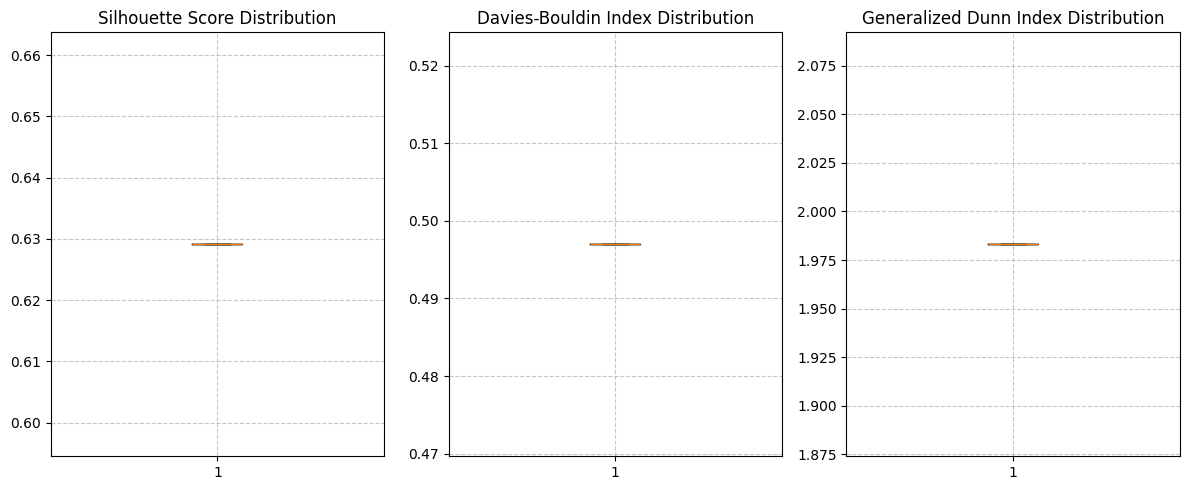

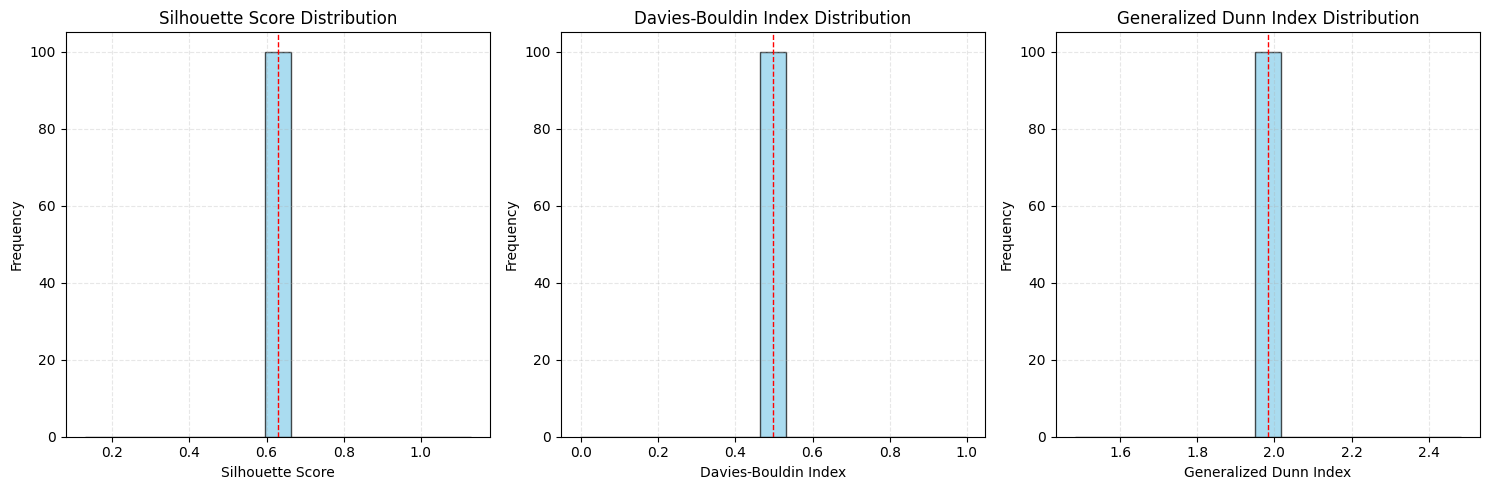

In [7]:
# FCM Bootstrapping
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from sklearn.metrics import davies_bouldin_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Your dataset
X = df  
X_array = X.to_numpy().T  

# Fixed parameters based on best results
n_clusters = 2
m = 1.2
n_bootstraps = 100

# To store results
silhouette_scores = []
dbi_scores = []
gdi_scores = []

print(f"Performing FCM bootstrapping with {n_bootstraps} resamples...")
print(f"Fixed parameters: clusters={n_clusters}, m={m}")

for i in range(n_bootstraps):
    try:
        # Bootstrap resample
        boot_indices = resample(np.arange(X.shape[0]), replace=True, n_samples=X.shape[0])
        X_boot = X.iloc[boot_indices]
        X_boot_array = X_boot.to_numpy().T
        
        # Fit FCM model
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_boot_array, c=n_clusters, m=m, error=0.005, 
            maxiter=1000, init=None, seed=42
        )
        labels = np.argmax(u, axis=0)  # Convert soft membership to hard labels
        
        # Calculate metrics
        sil = generalized_silhouette_score(X_boot, labels)
        dbi = davies_bouldin_score(X_boot, labels)
        gdi = generalized_dunn_index(X_boot.to_numpy(), labels)
        
        # Store results
        silhouette_scores.append(sil)
        dbi_scores.append(dbi)
        gdi_scores.append(gdi)
        
        if (i+1) % 10 == 0:
            print(f"Completed {i+1}/{n_bootstraps} bootstrap iterations")
            
    except Exception as e:
        print(f"Error in bootstrap iteration {i+1}: {e}")
        continue

# Calculate summary statistics
metrics = {
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": dbi_scores,
    "Generalized Dunn Index": gdi_scores
}

results = pd.DataFrame()
for metric_name, values in metrics.items():
    mean_val = np.mean(values)
    std_val = np.std(values)
    
    # Calculate 95% confidence intervals
    ci_lower = np.percentile(values, 2.5)
    ci_upper = np.percentile(values, 97.5)
    
    results = pd.concat([results, pd.DataFrame([{
        "Metric": metric_name,
        "Mean": mean_val,
        "Std": std_val,
        "95% CI Lower": ci_lower,
        "95% CI Upper": ci_upper
    }])], ignore_index=True)

# Display results
print("\n===== FCM Bootstrapping Results =====")
print(f"Parameters: clusters={n_clusters}, m={m}, bootstrap iterations={n_bootstraps}")
print("\nSummary Statistics:")
print(results.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Create box plots for visual analysis
plt.figure(figsize=(12, 5))
for i, (metric_name, values) in enumerate(metrics.items(), 1):
    plt.subplot(1, 3, i)
    plt.boxplot(values)
    plt.title(f"{metric_name} Distribution")
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Display histograms for each metric
plt.figure(figsize=(15, 5))
for i, (metric_name, values) in enumerate(metrics.items(), 1):
    plt.subplot(1, 3, i)
    plt.hist(values, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(values), color='red', linestyle='dashed', linewidth=1)
    plt.title(f"{metric_name} Distribution")
    plt.xlabel(metric_name)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()